In [1]:
from pathlib import Path
import json
import torch
import matplotlib.pyplot as plt

from board_recognition.eval import evaluate_trained_model
from board_recognition_pipeline.pipeline import PROJECT_ROOT

C:\Users\mauri\PycharmProjects\ChessVision\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:

PROJECT_ROOT = Path.cwd().parent.resolve()

CKPT_PATH   = PROJECT_ROOT / "runs" / "board_recognition" / "20250711_231752" / "model.pth"
TEST_IMAGES = PROJECT_ROOT / "datasets" / "synthetic_dataset" / "test" / "images"
TEST_CSV    = PROJECT_ROOT / "datasets" / "synthetic_dataset" / "test" / "corners.csv"

print(CKPT_PATH)
print(TEST_IMAGES)
print(TEST_CSV)

NUM_KEYPOINTS = 4      # TL, TR, BL, BR
DEVICE        = "cuda"

C:\Users\mauri\PycharmProjects\ChessVision\runs\board_recognition\20250711_231752\model.pth
C:\Users\mauri\PycharmProjects\ChessVision\datasets\synthetic_dataset\test\images
C:\Users\mauri\PycharmProjects\ChessVision\datasets\synthetic_dataset\test\corners.csv


In [6]:
evaluate_trained_model(
    model_path=CKPT_PATH,
    dataset_root=TEST_IMAGES,
    csv_path=TEST_CSV,
    num_keypoints=NUM_KEYPOINTS,
    output_dir=PROJECT_ROOT / "runs" / "board_recognition" / "eval",
    device=DEVICE
)

Evaluating: 100%|██████████| 500/500 [02:22<00:00,  3.51batch/s]


[Eval-Save] Metrics written to C:\Users\mauri\PycharmProjects\ChessVision\runs\board_recognition\eval\metrics.json


{'mean_l2_px': 3.560601077020168,
 'mean_pck_3px': 0.622375,
 'mean_pck_5px': 0.864375,
 'mean_pck_norm_005': 0.998,
 'mean_pck_norm_010': 0.998,
 'bbox_map': 0.9896190166473389,
 'bbox_map_50': 1.0}

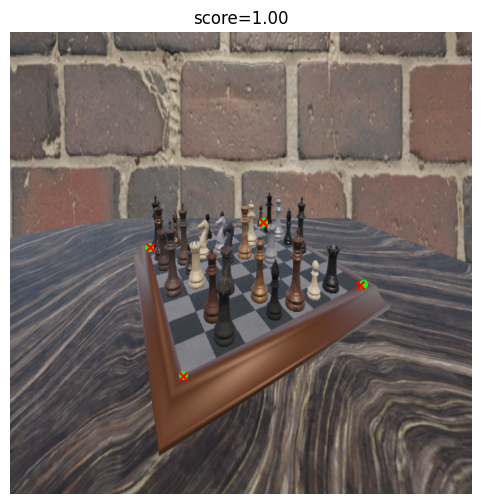

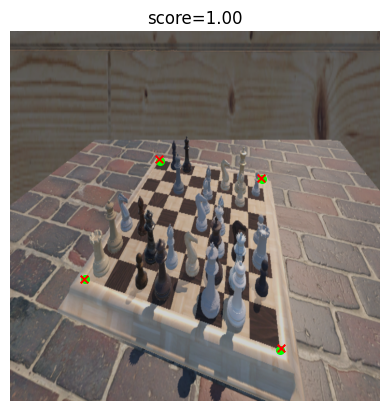

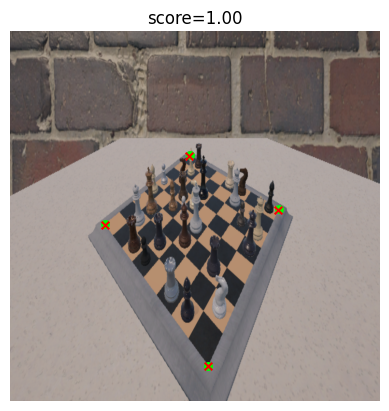

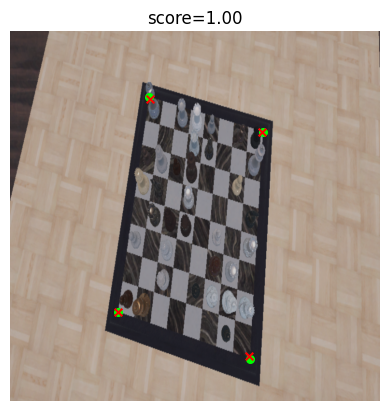

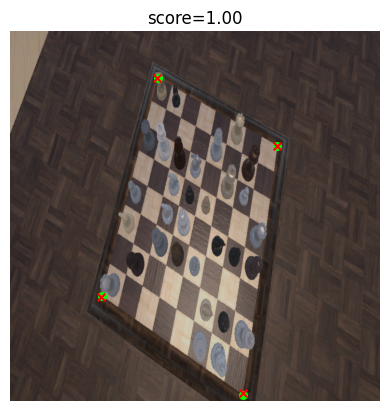

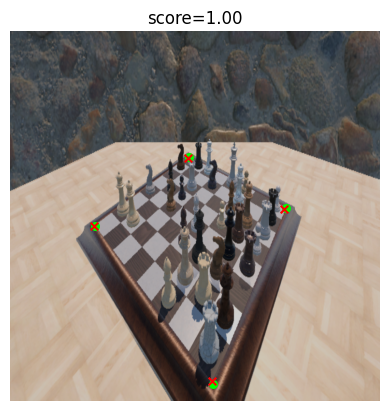

In [3]:
from board_recognition.eval import preview_predictions
from board_recognition import load_model

model = load_model(CKPT_PATH)

preview_predictions(
    model=model,
    dataset_root=TEST_IMAGES,
    csv_path=TEST_CSV,
    device="cuda",
    batch_size=4,
    max_examples=6,   # show 6 images, early-exit afterwards
)